In [1]:
from pysummarization.abstractablesemantics.enc_dec_ad import EncDecAD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger = getLogger("pysummarization")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)


In [3]:
document = """
An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories. Encyclopedia entries are longer and more detailed than those in most dictionaries.[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.[3][4][5][6]

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production). As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

The appearance of digital and open-source versions in the 20th century has vastly expanded the accessibility, authorship, readership, and variety of encyclopedia entries and called into question the idea of what an encyclopedia is[citation needed] and the relevance of applying to such dynamic productions the traditional criteria for assembling and evaluating print encyclopedias.[citation needed]

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title.[14]
Sixteenth century usage of the compounded word
In the sixteenth century there was a level of ambiguity as to how to use this new word. As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun. For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encyclopedia orbisque doctrinarum, hoc est omnium artium, scientiarum, ipsius philosophiae index ac divisio; Joachimus Fortius Ringelbergius's Lucubrationes vel potius absolutissima kyklopaideia (1538, 1541); Paul Skalich's Encyclopaediae sen orbis disciplinarum epistemon (1559); Gregor Reisch's Margarita philosophica (1503, retitled Encyclopaedia in 1583); and Samuel Eisenmenger's Cyclopaedia Paracelsica (1585).[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.[citation needed]

There have been two examples of the oldest vernacular use of the compounded word. In approximately 1490, Franciscus Puccius wrote a letter to Politianus thanking him for his Miscellanea, calling it an encyclopedia.[16] More commonly, François Rabelais is cited for his use of the term in Pantagruel (1532).[17][18]

The suffix -p(a)edia
Several encyclopedias have names that include the suffix -p(a)edia, to mark the text as belonging to the genre of encyclopedias. For example, Banglapedia (on matters relevant for Bangladesh).

Contemporary usage
Today in English, the word is most commonly spelled encyclopedia, though encyclopaedia (from encyclopædia) is also used in Britain.[19]

Characteristics
The modern encyclopedia was developed from the dictionary in the 18th century. Historically, both encyclopedias and dictionaries have been researched and written by well-educated, well-informed content experts, but they are significantly different in structure. A dictionary is a linguistic work which primarily focuses on alphabetical listing of words and their definitions. Synonymous words and those related by the subject matter are to be found scattered around the dictionary, giving no obvious place for in-depth treatment. Thus, a dictionary typically provides limited information, analysis or background for the word defined. While it may offer a definition, it may leave the reader lacking in understanding the meaning, significance or limitations of a term, and how the term relates to a broader field of knowledge. An encyclopedia is, theoretically, not written in order to convince, although one of its goals is indeed to convince its reader of its own veracity.

To address those needs, an encyclopedia article is typically not limited to simple definitions, and is not limited to defining an individual word, but provides a more extensive meaning for a subject or discipline. In addition to defining and listing synonymous terms for the topic, the article is able to treat the topic's more extensive meaning in more depth and convey the most relevant accumulated knowledge on that subject. An encyclopedia article also often includes many maps and illustrations, as well as bibliography and statistics.

Four major elements define an encyclopedia: its subject matter, its scope, its method of organization, and its method of production:


"""

In [4]:
from pysummarization.nlp_base import NlpBase
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer

In [5]:
nlp_base = NlpBase()
nlp_base.delimiter_list = [".", "\n"]
tokenizable_doc = SimpleTokenizer()
sentence_list = nlp_base.listup_sentence(document)
token_list = tokenizable_doc.tokenize(document)

In [6]:
sentence_list, len(sentence_list)

(['An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.\n',
  '[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories.\n',
  ' Encyclopedia entries are longer and more detailed than those in most dictionaries.\n',
  "[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.\n",
  '[3][4][5][6]\n',
  'Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), 

In [7]:
len(list(set(token_list)))

438

In [8]:
token_arr = np.array(token_list)

In [9]:
from pysummarization.vectorizabletoken.t_hot_vectorizer import THotVectorizer

In [10]:
vectorizable_token = THotVectorizer(token_list=token_arr.tolist())

In [11]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [12]:
seq_len = 5

In [13]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 438)

In [14]:
observed_arr[0][-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
abstractable_semantics = EncDecAD(
    encoder_decoder_controller=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=observed_arr.shape[-1],
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=500,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    
)

In [16]:
from pydbm.loss.mean_squared_error import MeanSquaredError

In [17]:
mean_squared_error = MeanSquaredError()

In [18]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 8.069191647793948e-06 Test: 9.031897968005718e-06
Epoch: 2
Loss: 
Training: 8.33165358723568e-06 Test: 8.889776463325335e-06
Best params are updated.
Epoch: 3
Loss: 
Training: 8.812836245512298e-06 Test: 8.645667379445579e-06
Epoch: 4
Loss: 
Training: 8.114917486524797e-06 Test: 8.489093502006162e-06
Epoch: 5
Loss: 
Training: 8.826063880319112e-06 Test: 8.025062377008215e-06
Epoch: 6
Loss: 
Training: 8.109263359780433e-06 Test: 8.489091393874945e-06
Epoch: 7
Loss: 
Training: 8.250876930601477e-06 Test: 8.486246744983464e-06
Epoch: 8
Loss: 
Training: 8.3684905021438e-06 Test: 9.247080590838492e-06
Epoch: 9
Loss: 
Training: 8.516506615835379e-06 Test: 7.866902288183754e-06
Epoch: 10
Loss: 
Training: 8.516020869806859e-06 Test: 8.52206363622424e-06
Epoch: 11
Loss: 
Training: 8.002648062265887e-06 Test: 8.71294143141101e-06
Rolling mean of Loss (Window is 10): 
Training: 8.39158211255538e-06 Test: 8.56928823438959e-06
Epoch: 12
Loss: 
Trai

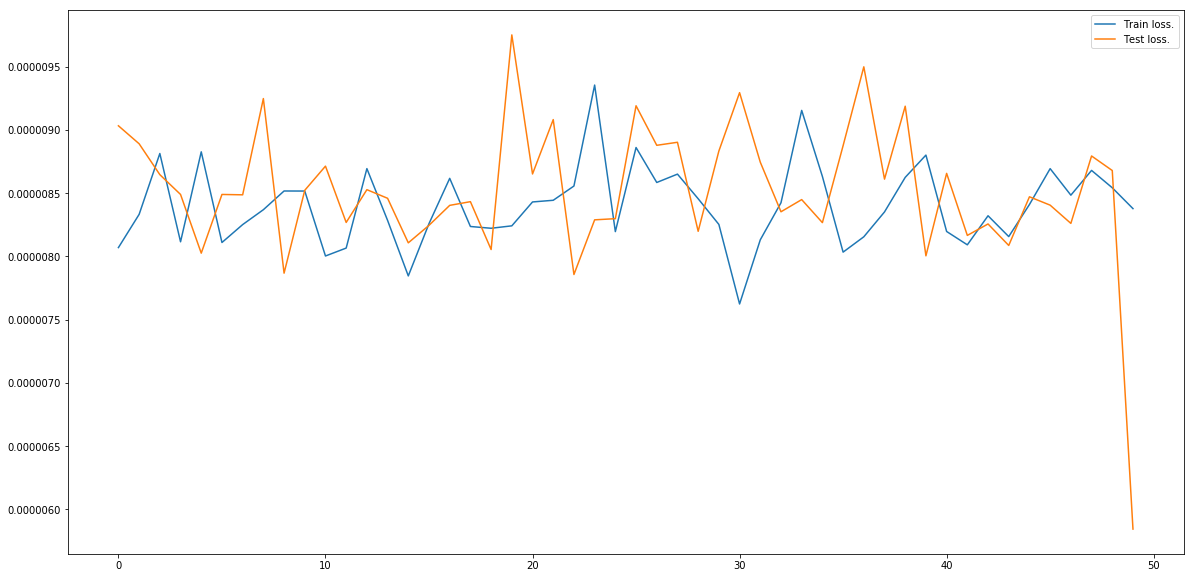

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.encoder_decoder_controller.verificatable_result.logs_df.values[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.encoder_decoder_controller.verificatable_result.logs_df.values[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [20]:
abstractable_semantics.encoder_decoder_controller.get_reconstruction_error().shape

(20, 5, 438)

In [21]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [22]:
for a in abstract_list:
    print(a)

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production).

[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title

In [23]:
from pysummarization.vectorizabletoken.thotvectorizer.dbm_t_hot_vectorizer import DBMTHotVectorizer

In [24]:
token_arr = np.array(token_list)
vectorizable_token = DBMTHotVectorizer(token_list=token_arr.tolist())

In [25]:
vectorizable_token.pre_learn()

In [26]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [27]:
vector_arr.shape

(745, 100)

In [28]:
seq_len = 5

In [29]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 100)

In [30]:
abstractable_semantics = EncDecAD(
    encoder_decoder_controller=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=observed_arr.shape[-1],
    weight_limit=0.5,
    dropout_rate=0.0,
    pre_learning_epochs=50,
    epochs=500,
    batch_size=20,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3
)

In [31]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 0.0003240445385630355 Test: 0.00027369096068468636
Best params are updated.
Epoch: 2
Loss: 
Training: 0.00034842840555386145 Test: 0.00031269076683355815
Epoch: 3
Loss: 
Training: 0.00035745870304389123 Test: 0.00029575211097110474
Epoch: 4
Loss: 
Training: 0.00033307760818834076 Test: 0.0003413172709100912
Epoch: 5
Loss: 
Training: 0.00030540049565760144 Test: 0.00034609274443079104
Epoch: 6
Loss: 
Training: 0.00033131990134320304 Test: 0.0003294234161724156
Epoch: 7
Loss: 
Training: 0.00030923146916788015 Test: 0.00030148710532918696
Epoch: 8
Loss: 
Training: 0.0003148194952955397 Test: 0.000348445168111751
Epoch: 9
Loss: 
Training: 0.0002901976106339793 Test: 0.00030319151486626065
Epoch: 10
Loss: 
Training: 0.0003244857004040584 Test: 0.0003801636525021994
Epoch: 11
Loss: 
Training: 0.0003170251693067035 Test: 0.00031522022222432565
Rolling mean of Loss (Window is 10): 
Training: 0.00032384639278513913 Test: 0.0003232254710812045
E

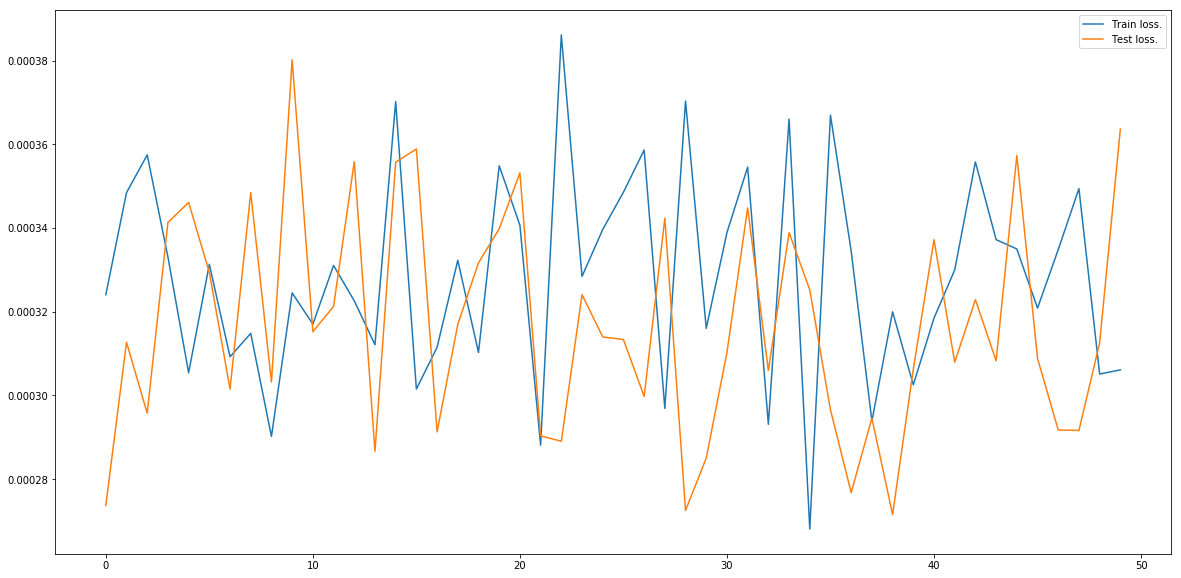

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.encoder_decoder_controller.verificatable_result.logs_df.values[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.encoder_decoder_controller.verificatable_result.logs_df.values[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [33]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [34]:
for a in abstract_list:
    print(a)

 In approximately 1490, Franciscus Puccius wrote a letter to Politianus thanking him for his Miscellanea, calling it an encyclopedia.

[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title.

